In [1]:
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings(action='ignore')

import seaborn as sns
sns.set_palette("pastel")
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
%matplotlib inline

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [2]:
mul = pd.read_excel('2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx')
data = pd.read_csv('2020 bigcontest data_wisenut.csv',sep='')

In [3]:
data = data.rename(columns =  {'GU_NM(삭제)':'GU_NM', 'DONG_NM(삭제)':'DONG_NM'})
data['CTGG_CD'] = data['GU_CD'].astype('str').str[:2].astype('int64')
data['HDNG_CD'] = data['DONG_CD']
data['CGDG_CD'] = data['CTGG_CD'].astype('str')+data['HDNG_CD'].astype('str')

In [4]:
mul['DL_YM'] = mul['DL_YMD'].astype('str').str[:4].astype('int64')
mul['CGDG_CD'] = mul['CTGG_CD'].astype('str')+mul['HDNG_CD'].astype('str')

mul['YEAR'] = '20'+mul['DL_YM'].astype('str').str[:2]
mul['MONTH'] = mul['DL_YM'].astype('str').str[-2:]

* 도서/ 음반 => 문화취미
* 스포츠/레저 => 레저업소
* 식품 => 요식업소(억지일수도...)
* 화장품/미용 => 보건위생(세부분류가 화장품, 마스크, 소독재, 온천장, 피부미용실, 사우나, 안마, 마사지, 목욕탕 해당되기 때문)

In [5]:
mul_f1 = mul.query('(DL_GD_LCLS_CD == 12) or (DL_GD_LCLS_CD == 16) or (DL_GD_LCLS_CD == 17) or (DL_GD_LCLS_CD == 21)')

In [6]:
up_dl = mul_f1.groupby(['YEAR','MONTH','DL_GD_LCLS_NM'])['INVC_CONT'].sum().reset_index()
up_dl_gd = mul_f1.groupby(['YEAR','MONTH','DL_GD_LCLS_NM','CGDG_CD'])['INVC_CONT'].sum().reset_index()

In [7]:
data.drop(columns=['SEQ','HDNG_CD','HDNG_CD','CTGG_CD','GU_CD','DONG_CD'],inplace=True)

In [8]:
df = pd.melt(data,id_vars=['CGDG_CD','GU_NM','DONG_NM'],var_name='CAT',value_name='CNT')

In [9]:
df['MONTH'] = df['CAT'].str[-2:].astype('int64')
df['YEAR'] = df['CAT'].str[-6:-2].astype('int64')
df['CAT'] = df['CAT'].str[:-7]

In [10]:
df['GU_DONG'] = df[['GU_NM', 'DONG_NM']].apply(lambda x: ','.join(x), axis=1)

In [11]:
f = df[df['CAT'].str.contains('TIVE')]
f['UP'] = f['CAT'].str[:3]
f['SENTIMENT'] = f['CAT'].str[-8:-5]

In [12]:
up_dl_gd['MONTH'] = up_dl_gd['MONTH'].astype('int64')
up_dl_gd['YEAR'] = up_dl_gd['YEAR'].astype('int64')

In [24]:
up_cnt = f.query('SENTIMENT == "POS"').groupby(['YEAR','MONTH','GU_DONG','CGDG_CD','UP'])['CNT'].sum().reset_index()

In [45]:
a = pd.pivot_table(up_cnt,index=['YEAR','MONTH','CGDG_CD','GU_DONG'],columns='UP',values='CNT').reset_index()
b = pd.pivot_table(up_dl_gd, index=['YEAR','MONTH','CGDG_CD'],columns='DL_GD_LCLS_NM',values='INVC_CONT').reset_index()

In [46]:
a1 = pd.pivot_table(up_cnt,index=['YEAR', 'CGDG_CD','GU_DONG'],columns=['UP','MONTH'],values='CNT').reset_index()
b1 = pd.pivot_table(up_dl_gd, index=['YEAR','CGDG_CD'],columns=['DL_GD_LCLS_NM','MONTH'],values='INVC_CONT').reset_index()

In [47]:
a

UP,YEAR,MONTH,CGDG_CD,GU_DONG,UP1,UP2,UP3,UP4,UP5,UP6
0,2019,2,11517,"대구 중구,동인동",0,0,24,14,38,20
1,2019,2,11545,"대구 중구,삼덕동",26,0,2,6,38,43
2,2019,2,11565,"대구 중구,성내동",19,0,3,0,0,0
3,2019,2,11595,"대구 중구,대신동",19,0,3,0,0,0
4,2019,2,11640,"대구 중구,남산동",19,0,73,147,0,14
...,...,...,...,...,...,...,...,...,...,...
275,2020,5,35560,"서울 노원구,월계동",3,0,296,205,386,85
276,2020,5,35595,"서울 노원구,공릉동",235,2,437,4301,908,242
277,2020,5,35611,"서울 노원구,하계동",138,0,213,4426,938,17
278,2020,5,35619,"서울 노원구,중계동",0,0,718,436,396,79


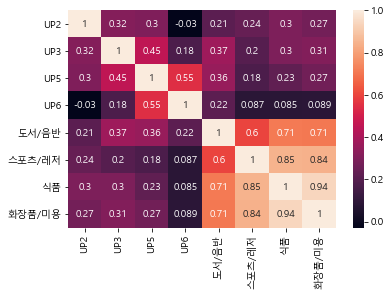

In [50]:
c = pd.merge(a,b,how='inner',on=['CGDG_CD','YEAR','MONTH']).query('YEAR == 2019').drop(columns=['YEAR','MONTH','UP1','UP4'])
sns.heatmap(c.corr(),annot=True)

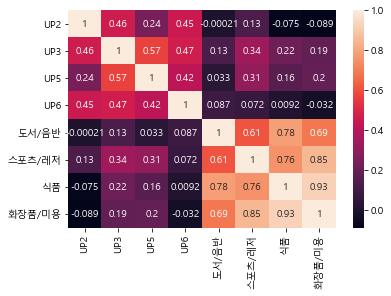

In [28]:
d = pd.merge(a,b,how='inner',on=['CGDG_CD','YEAR','MONTH']).query('YEAR == 2020').drop(columns=['YEAR','MONTH','UP1','UP4'])
sns.heatmap(d.corr(),annot=True)

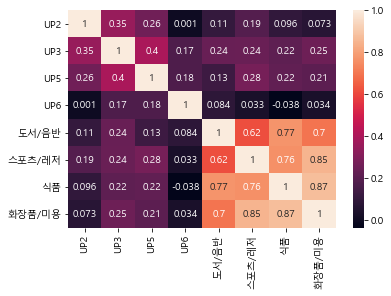

In [29]:
e = pd.merge(a,b,how='inner',on=['CGDG_CD','YEAR','MONTH']).drop(columns=['YEAR','MONTH','UP1','UP4'])
sns.heatmap(e.corr(),annot=True)

In [30]:
a

UP,YEAR,MONTH,CGDG_CD,GU_DONG,UP1,UP2,UP3,UP4,UP5,UP6
0,2019,2,11517,"대구 중구,동인동",0,0,24,14,38,20
1,2019,2,11545,"대구 중구,삼덕동",26,0,2,6,38,43
2,2019,2,11565,"대구 중구,성내동",19,0,3,0,0,0
3,2019,2,11595,"대구 중구,대신동",19,0,3,0,0,0
4,2019,2,11640,"대구 중구,남산동",19,0,73,147,0,14
...,...,...,...,...,...,...,...,...,...,...
275,2020,5,35560,"서울 노원구,월계동",3,0,296,205,386,85
276,2020,5,35595,"서울 노원구,공릉동",235,2,437,4301,908,242
277,2020,5,35611,"서울 노원구,하계동",138,0,213,4426,938,17
278,2020,5,35619,"서울 노원구,중계동",0,0,718,436,396,79
